## Importing Packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from plotly import tools
from chart_studio import plotly
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

### Getting the Data <br>
The data fetched using the API and converting in csv format from Yahoo Finance Website. The website provides a rich source of financial market data. 

In [2]:
#loading the file
df_amazon = pd.read_csv("AMZN.csv")
df_amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/15/1997,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,5/16/1997,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,5/19/1997,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,5/20/1997,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,5/21/1997,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6469,1/30/2023,101.089996,101.739998,99.010002,100.550003,100.550003,70691900
6470,1/31/2023,101.160004,103.349998,101.139999,103.129997,103.129997,66527300
6471,2/1/2023,102.529999,106.239998,101.239998,105.150002,105.150002,80450100
6472,2/2/2023,110.250000,114.000000,108.879997,112.910004,112.910004,158154200


In [3]:
df_amazon.shape
print("Total number of rows are:",df_amazon.shape[0])
print("Total number of columns are:",df_amazon.shape[1])

Total number of rows are: 6474
Total number of columns are: 7


In [4]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6474 non-null   object 
 1   Open       6474 non-null   float64
 2   High       6474 non-null   float64
 3   Low        6474 non-null   float64
 4   Close      6474 non-null   float64
 5   Adj Close  6474 non-null   float64
 6   Volume     6474 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 354.2+ KB


In [5]:
#converting the Date column to Datetime
df_amazon['Date_1'] = pd.to_datetime(df_amazon['Date'])
print("Minimum date value : {}".format(df_amazon['Date_1'].min()))
print("Maximum date value : {}".format(df_amazon['Date_1'].max()))

Minimum date value : 1997-05-15 00:00:00
Maximum date value : 2023-02-03 00:00:00


Have a good look at closing prices and date. Most time series analysis go with trying to fo find closing prices. The reason is because closing prices generally summarize the way business was going better than opening prices or average prices.

In [6]:
df_amazon.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date_1       0
dtype: int64

In [7]:
df_amazon[df_amazon.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume,Date_1


In [8]:
df_amazon.describe()

,Open,High,Low,Close,Adj Close,Volume,Date_1
count,6474.000000,6474.000000,6474.000000,6474.000000,6474.000000,6.474000e+03,6474
mean,31.185148,31.559382,30.773725,31.172728,31.172728,1.430776e+08,2010-03-26 09:48:46.042632192
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,1997-05-15 00:00:00
25%,1.991750,2.023625,1.954750,1.997406,1.997406,6.935250e+07,2003-10-21 06:00:00
50%,6.347750,6.421750,6.257000,6.343750,6.343750,1.062200e+08,2010-03-27 12:00:00
75%,38.099998,38.299999,37.797749,38.006750,38.006750,1.612745e+08,2016-08-29 18:00:00
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09,2023-02-03 00:00:00
std,47.956919,48.518132,47.329547,47.920817,47.920817,1.404478e+08,NaN


### Exploratory Data Analysis

**Distribution of Column Close**

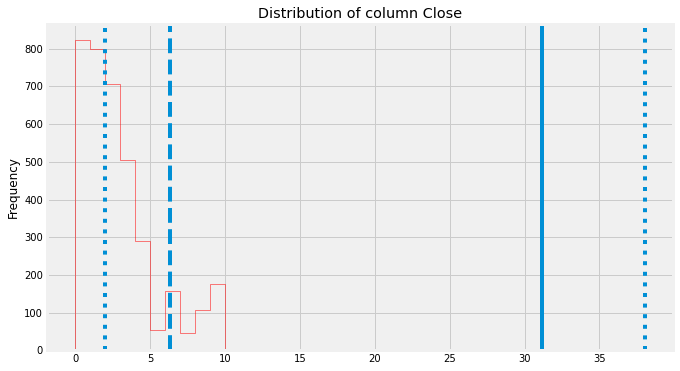

In [9]:
df_amazon['Close'].plot(kind ='hist', histtype = 'step',range = [0,10], figsize = (10,6), color = 'red')
plt.axvline(df_amazon.Close.mean())
plt.axvline(df_amazon.Close.median(),linestyle = '--')
plt.axvline(df_amazon.Close.quantile(0.25),linestyle = ':')
plt.axvline(df_amazon.Close.quantile(0.75),linestyle = ':')
plt.title('Distribution of column Close')
plt.show()

**Checking for Abnormalities with Box Plot**

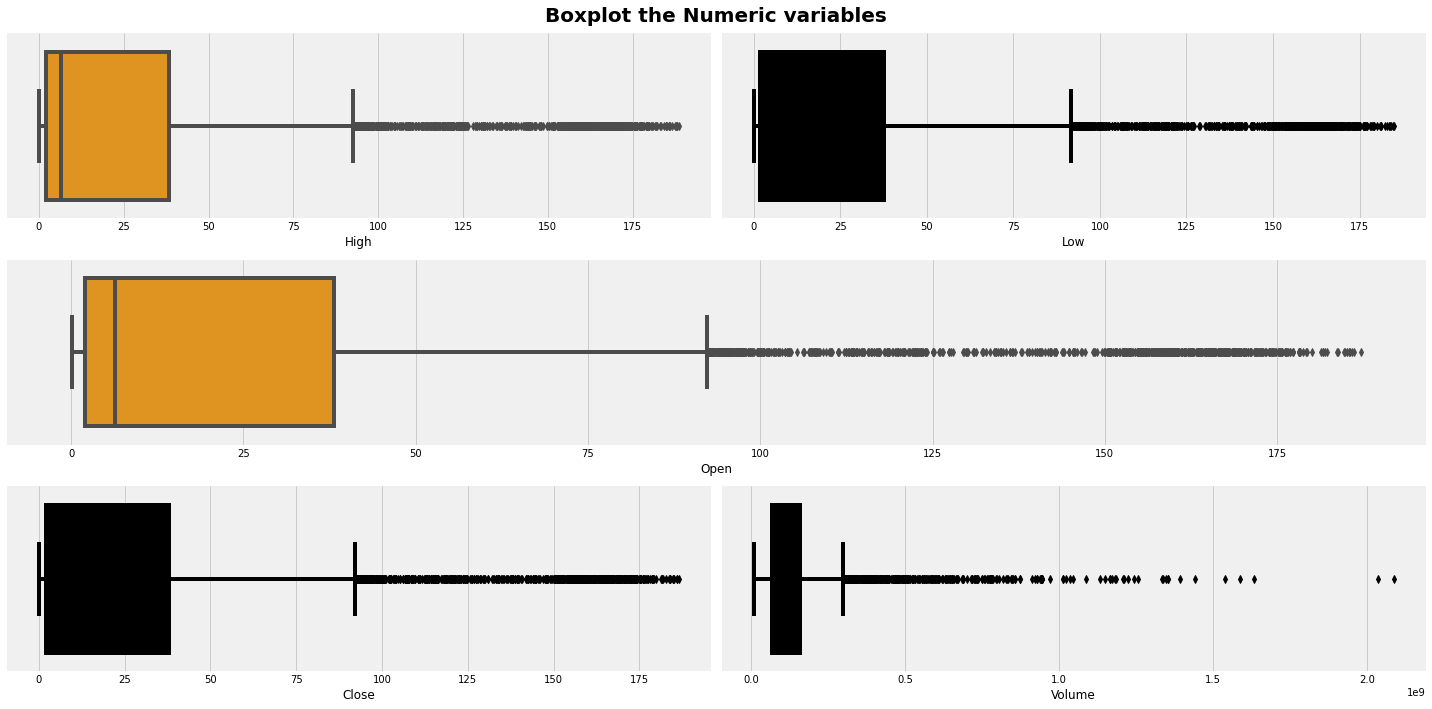

In [10]:
colors = ['#FF9900','#000000']                                         #defining colors
fig=plt.figure(figsize=(20,10), tight_layout=True)                     #figure object
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')  #title for subplots
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df_amazon['High'], ax=ax['A'], color=colors[0])
sns.boxplot(df_amazon['Low'], ax=ax['B'], color=colors[1])
sns.boxplot(df_amazon['Open'], ax=ax['C'], color=colors[0])
sns.boxplot(df_amazon['Close'], ax=ax['D'], color=colors[1])
sns.boxplot(df_amazon['Volume'], ax=ax['E'], color=colors[1])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

There seems to be ouliers in the data set, however, those values can't be considered as outlier as they may be extrem values during peak selling days


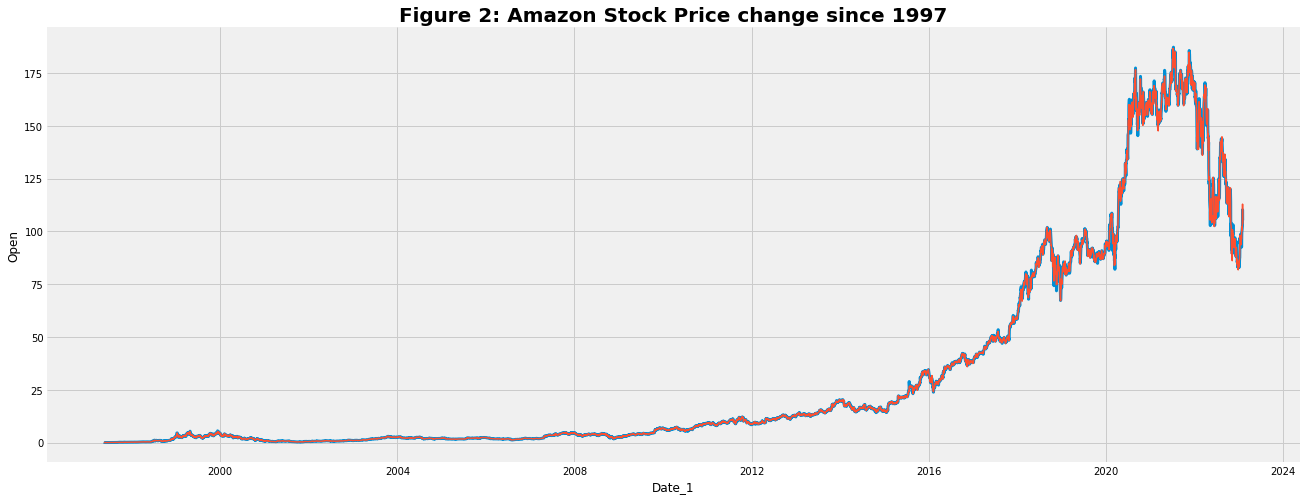

In [11]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data= df_amazon, x='Date_1',y='Open', linewidth = 3)
ax=sns.lineplot(data= df_amazon, x='Date_1',y='Close', linewidth = 1.5)
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("Figure 2: Amazon Stock Price change since 1997", size=20, weight='bold')
plt.show()

Evidently, Amazon business bloomed after year 2010 and peaked after year 2015

In [12]:
df_amazon['Month']= df_amazon['Date_1'].dt.year
df_month = df_amazon[df_amazon['Month'] >= 2010]

trace = go.Ohlc(x= df_month['Date_1'],
                open = df_month['Open'],
                high=df_month['High'],
                low=df_month['Low'],
                close=df_month['Close'],
               increasing=dict(line=dict(color= '#58FA58')),
                decreasing=dict(line=dict(color= '#FA5858')))

layout = {
    'title': 'Amazon Historical Price',
    'xaxis': {'title': 'Date',
             'rangeslider': {'visible': False}},
    'yaxis': {'title': 'Stock Price (USD$)'},
    'shapes': [{
        'x0': '2016-12-09', 'x1': '2016-12-09',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    
    'annotations': [{
        'x': '2017-01-20', 'y': 0.05, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'President Donald Trump <br> takes Office'
    }],

   
}

data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='Amazon Historical Price Trend')

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

plot(fig, filename='interactive_Stock_Close.html', auto_open=False)

'interactive_Stock_Close.html'

Conclusions:
- The amazon stock price from the year 1997 to 2010 saw no significant growth
- After year 2010 - exponential growth
- Covid pendamic year 2020 boosted Amazon's stock prices 

Before moving to further analysis, it is important to understand following terminologies

**1. Moving Averge:**

A moving average is a metric often used in technical analysis. For a stock, it’s a constantly updated average price. Unlike trying to track a stock price day-to-day, a moving average smooths price volatility and is an indicator of the current direction a price is headed.

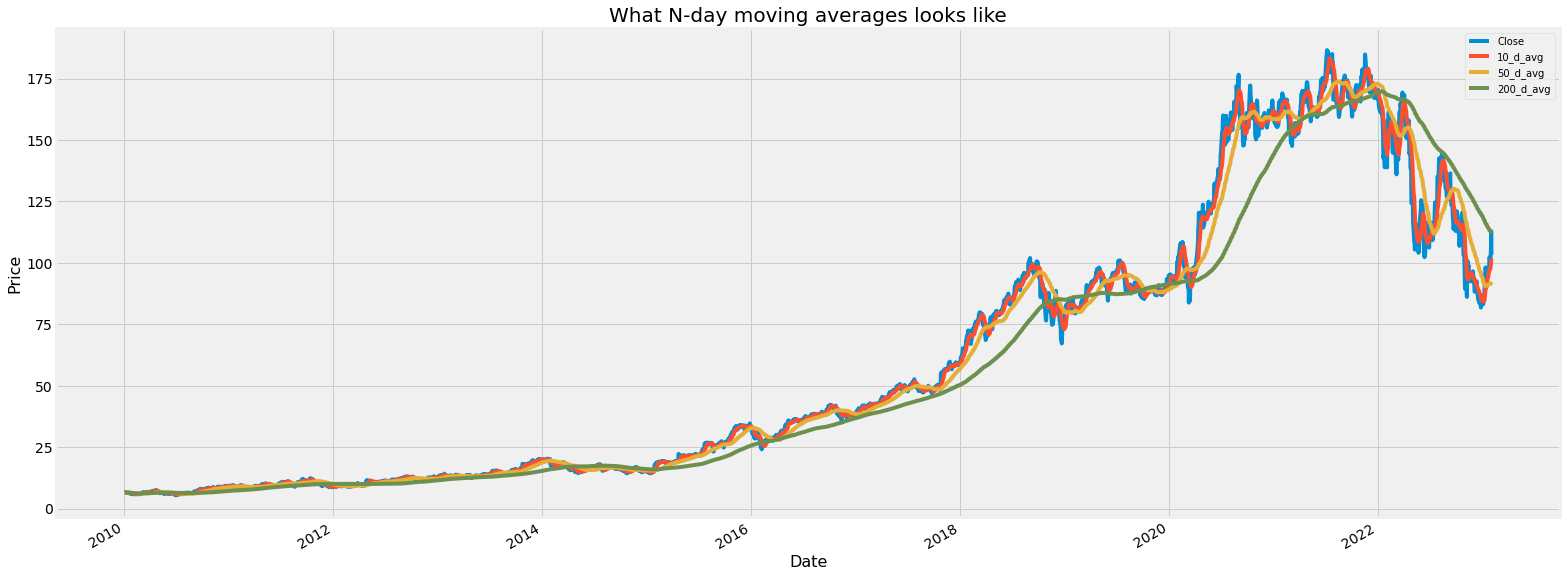

In [13]:
# Moving Averages (10 days, 50 days and 200 days) using .rolling() function
df_month['10_d_avg'] = df_month.Close.rolling(window=10,min_periods=1).mean()
df_month['50_d_avg'] = df_month.Close.rolling(window=50,min_periods=1).mean()
df_month['200_d_avg'] = df_month.Close.rolling(window=200,min_periods=1).mean()
close_p = df_month['Close'].values.tolist()


# Variables to insert into plotly
ten_d = df_month['10_d_avg'].values.tolist()
fifty_d = df_month['50_d_avg'].values.tolist()
twoh_d = df_month['200_d_avg'].values.tolist()
date = df_month['Date_1'].values.tolist()

# Before plotting, for time series analysis it is important to set date values an index 
df_month = df_month.set_index('Date_1')

#plotting moving averages to compare with original:
df_month[['Close','10_d_avg','50_d_avg','200_d_avg']].plot(figsize = (24,10))
plt.title("What N-day moving averages looks like", fontsize = 20)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Price", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


In [14]:
df_month.drop('Date',axis =1,inplace = True)

In [15]:
#analysing the trend of moving averages

df_month.reset_index(inplace = True) 
# Plotly
trace0 = go.Scatter(
    x = df_month['Date_1'],
    y = ten_d,
    name = '10-day MA',
    line = dict(
        color = ('#ff6347'),
        width = 4)
)
trace1 = go.Scatter(
    x = df_month['Date_1'],
    y = fifty_d,
    name = '50-day MA',
    line = dict(
        color = ('#92a1cf'),
        width = 4,
    dash="dot") )

trace2 = go.Scatter(
    x = df_month['Date_1'],
    y = twoh_d,
    name = '200-day MA',
    line = dict(
        color = ('#2EF688'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
data = [trace0, trace1, trace2]

layout = dict(title = 'Moving Averages for Amazon',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Price'),
              annotations=[dict(
                x='2018-09-28',
                y=100,
                xref='x',
                yref='y',
                text='<i> First major decline <br> after 10-d crosses <br> 50-d moving average </i>',
                showarrow=True,
                arrowhead=5,
                ax=5,
                ay=-50
                  ),
                           dict(
                 x = "2019-01-01",
                y = 85,
                text = "<i>Upward trend after <br> 10-day crosses <br>200-day moving average </i>",
                showarrow=True,
                arrowhead=5,
                textangle = 0,
                    ax = 45,
                   ay = 50,
                  font = dict(
                  color = "black",
                  size = 12)),
                        
                    dict(
                 x = "2020-04-15",
                y = 92,
                text = "<i>Second upward trend </i>",
                showarrow=True,
                arrowhead=5,
                textangle = 0,
                    ax = 180,
                   ay = 88,
                  font = dict(
                  color = "black",
                  size = 12)),
                           
                           dict(
                 x = "2020-09-15",
                y = 169,
                text = "<i>Second major decline </i>",
                showarrow=True,
                arrowhead=5,
                textangle = 0,
                    ax = 90,
                   ay = -88,
                  font = dict(
                  color = "black",
                  size = 12)),
                           
                           
        ],
              paper_bgcolor='#FFF9F5',
              plot_bgcolor='#FFF9F5'
              )
                  
                  

fig = dict(data=data, layout = layout)
iplot(fig, filename='styled-line')

plot(fig, filename='interactive_moving_average_trend', auto_open=False)

'interactive_moving_average_trend.html'

**2.Is your Data Stationary?** <br><br>
Time serious data only works with Stationary data. <br><br>

Stationary! Ugh, what does this mean? <br>
Let's us briefly understand the math:<br>
- Stationary data that the property that the mean, variance, and autocorrelation structure do not change over time. <br> 

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

Pre-requisite for Stationary Data:
1. Mean should be constant
2. Standard deviation should be constant
<br>
*How can we achieve this in python?*<br>
1. Using rolling statistics

2. Duckey Fuller test

Approach 1: Rolling Stastitics

In [31]:
df_month.set_index('Date_1',inplace = True)

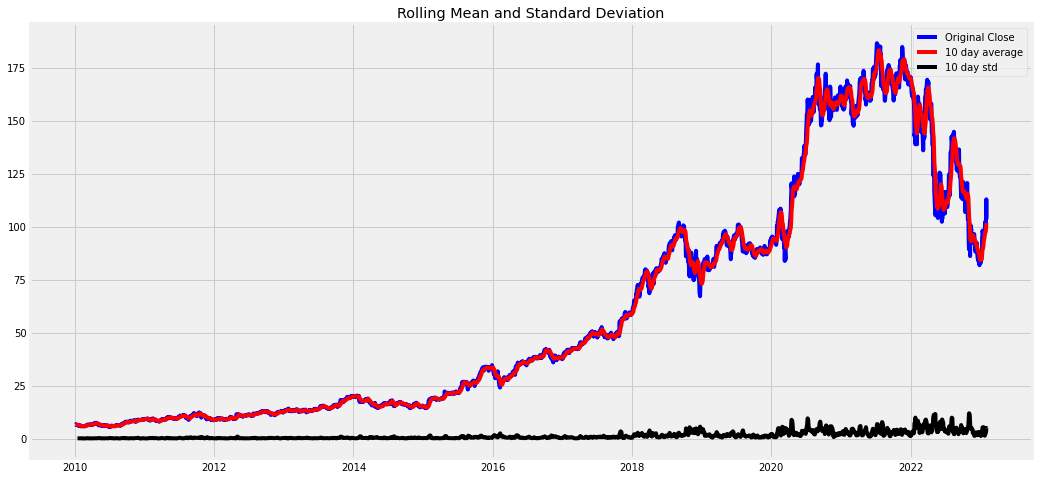

In [32]:
df_month['10_d_std'] = df_month['Close'].rolling(10).std()

plt.figure(figsize = (16,8))

original = plt.plot(df_month['Close'],color = 'blue', label = 'Original Close')
mean = plt.plot(df_month['10_d_avg'],color = 'red',label = '10 day average')
std  = plt.plot(df_month['10_d_std'],color = 'black',label = '10 day std')

plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation")

plt.show(block = False)

From the graph observse,
1. Rolling standard deviation (in black) is more or less constant with time (straight line)
2. Rolling mean (in red) is not constant with time exponential line)
<br>
From the pre-requisites of Stationary data this  is not a stationary data

How to make this Stationary?<br>
We can take log transformation, square root transformation, q transformation. We do not know which transformation will make the data stationary

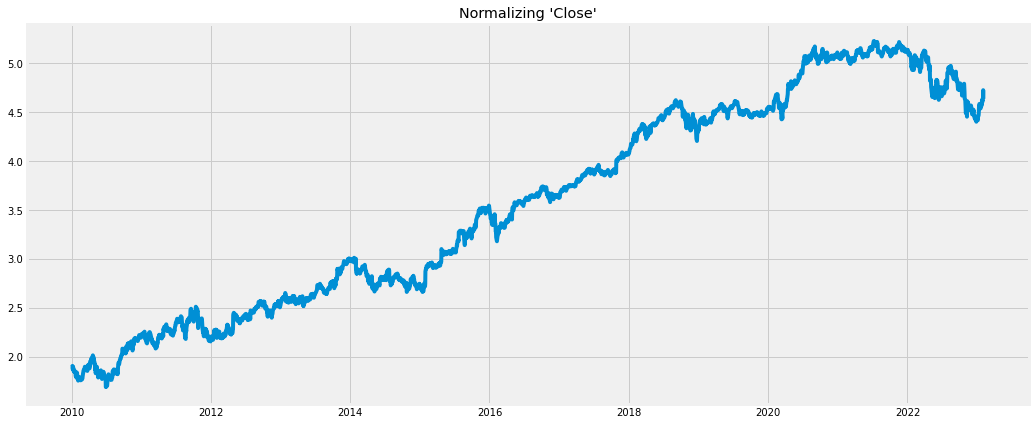

In [33]:
#let's try with log transformation:
plt.figure(figsize =(16,7))
fig = plt.figure(1)

log_trans = np.log(df_month['Close'])
plt.title("Normalizing 'Close'")
plt.plot(log_trans)
plt.show()

Well, this is not a stationary time series. Stationary time series will not show upward trend :(

What now? Just to make sure our assumption is not wrong, let's decompose the time series into seasonality. <br>
Now, how to do this? <br>
1. Import seasonal_decompose package from statsmodels
2. Capture different components

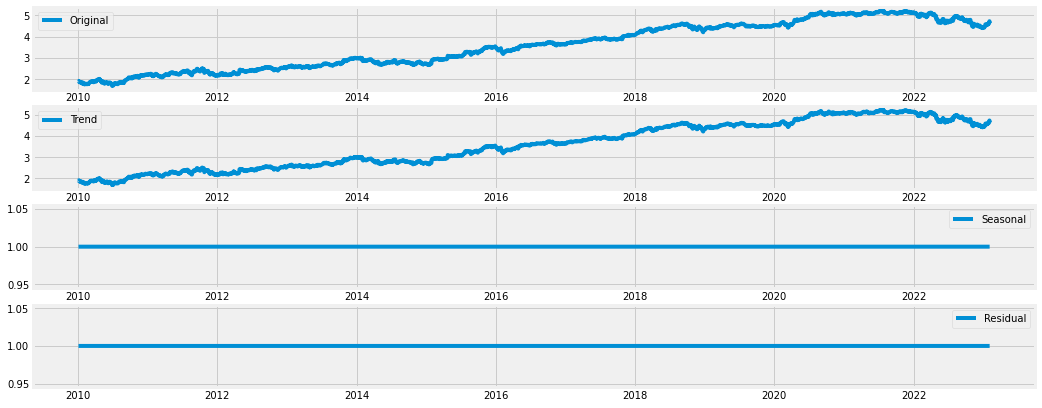

In [34]:
#Decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_trans,period =1, model = 'multiplecative')

#different components from "decomposition"
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#Let's plot
plt.figure(figsize = (16,7))
fig = plt.figure(1)

#plot the log transformed column "Close"
plt.subplot(411)
plt.plot(log_trans, label ='Original')
plt.legend(loc ='best')

#plot the Trend from line 6
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc ='best')

#plot the Seasonal from line 7
plt.subplot(413)
plt.plot(seasonal, label ='Seasonal')
plt.legend(loc ='best')

#plot the Residual from line 8
plt.subplot(414)
plt.plot(residual, label ='Residual')
plt.legend(loc ='best')
plt.show()

Well, look at the Trend graph. It's a full proof confirmation that the data is not stationary even after log transformation :(

Now what else can be done? The answer is *differencing*. 

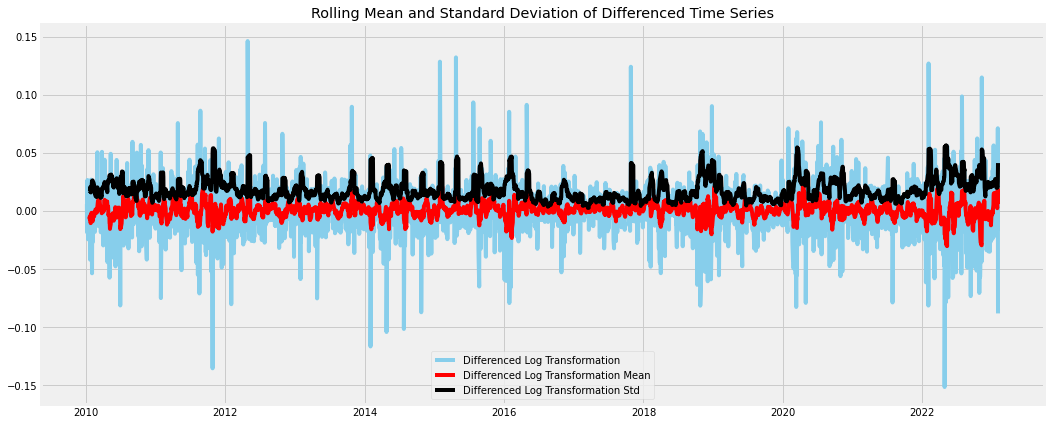

In [35]:
plt.figure(figsize = (16,7))
fig = plt.figure(1)

#differencing using .shift()
log_tans_diff = log_trans - log_trans.shift()

#take the mean and std of the differenced data
mean = log_tans_diff.rolling(window=10).mean()
std = log_tans_diff.rolling(window=10).std()

#let's plot
plt.plot(log_tans_diff, color = 'skyblue', label = 'Differenced Log Transformation')
plt.plot(mean, color = 'red', label = 'Differenced Log Transformation Mean')
plt.plot(std, color = 'black', label = 'Differenced Log Transformation Std')

plt.legend(loc = 'best')
plt.title("Rolling Mean and Standard Deviation of Differenced Time Series")
plt.show()

Okay! What is the graph now? It looks too complicated to read :(
<br>
Well, the red and black lines represents mean and standard deviation respectively. Both of the lines do not have upwards pattern. If we take two different points on x axis and subtract the mean or the standard deviation, the difference will be almost same. <br>

So, we are assuming that this time series is Stationary ( by pre-requisite of Stationary Data)

<br> Finally!!!

Important note:
1. Recall so far, we have done a log transformation and a differencing on our data. We will need to revise it later in the code

Approach 2: Dickey Fuller Test: <br>
- A popular stastical test often used is "Dickey-Fuller" test. It takes a term call "Unit root" and produces results for Null and Alternate Hypothesis.
<br>Null Hypothesis: Series has unit root
<br> Alternate Hypothesis: Series has no unit root

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.


In [36]:
#Dickey Fuller Test for Staionarity 
#let's create a function for this:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    
    #Determing rolling statistics
    rolmean = series.rolling(10).mean()
    rolstd = series.rolling(10).std()
    
    #Plot rolling statistics:
    plt.figure(figsize = (16,7))
    fig = plt.figure(1)
    
    plt.plot(series, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    
    print('/nResults for Dickey Fuller Test:')
    results = adfuller(series)
    print("ADF Statistics: ", results[0])
    print("p-value:  ", results[1])
    
    if results[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary ")
    else:
        print("\nWeek evidence against the null hypothesis, accept the null hypothesis. Data has unit root and is not stationary ")

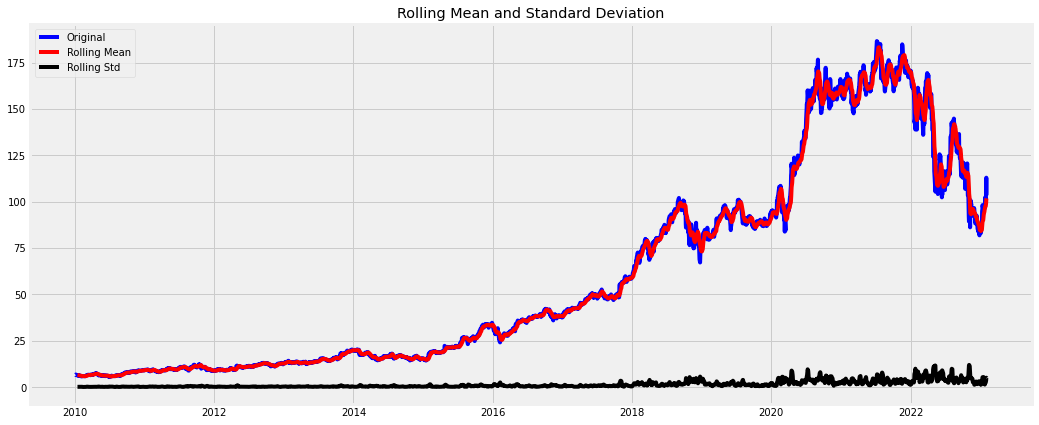

/nResults for Dickey Fuller Test:
ADF Statistics:  -0.8949902508458265
p-value:   0.7896177226675026

Week evidence against the null hypothesis, accept the null hypothesis. Data has unit root and is not stationary 


In [37]:
adf_test(df_month['Close'])

### ACF and PACF 

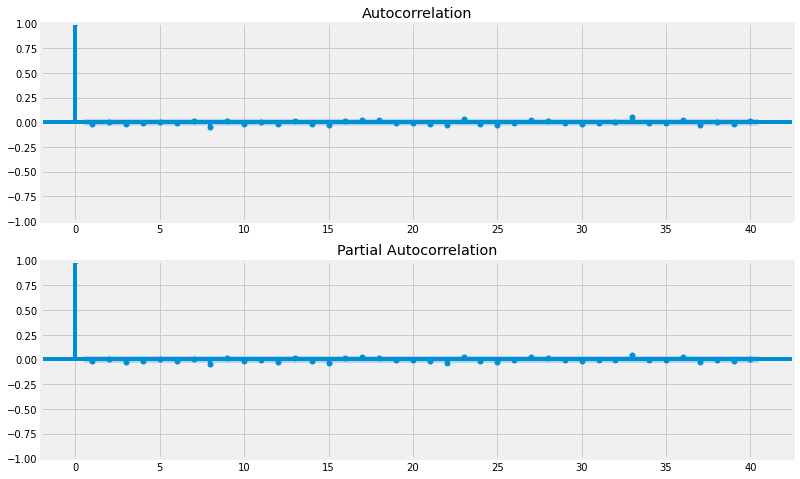

In [38]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(log_tans_diff, nlags = 20)
lag_pacf = pacf(log_tans_diff, nlags = 20)

import statsmodels.api as sm
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(log_tans_diff.dropna(), lags = 40, ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(log_tans_diff.dropna(), lags = 40, ax = ax2)

Whenever you are running a ARIMA model you do not know what should be the value of d,p and q. These charts helps to select p and q values. The highlidhted tiny blue part across x axis is confidence range. If the vertical lines passes this range then we should select the number of lines crossing the confidence interval for q (AR) values from ACF and p (MA) value from PACF. 
<br>
In this particular case, both q and p values seems to be 0

Now, we have got our p and q values as zero and our d(differencing)  value was 1 

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import statsmodels.api as sm

Reading ACF and PACF graphs can be difficult sometimes. We can also use autmo_arima() to let get the best values for p,q and d

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16139.927, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16139.192, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16139.180, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16136.709, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16137.013, Time=2.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 6.008 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3295
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8071.964
Date:                Fri, 05 May 2023   AIC                         -16139.927
Time:                        12:49:22   BIC                         -16127.727
Sample:                             0   HQIC                        -16135.560
                               - 3295                             

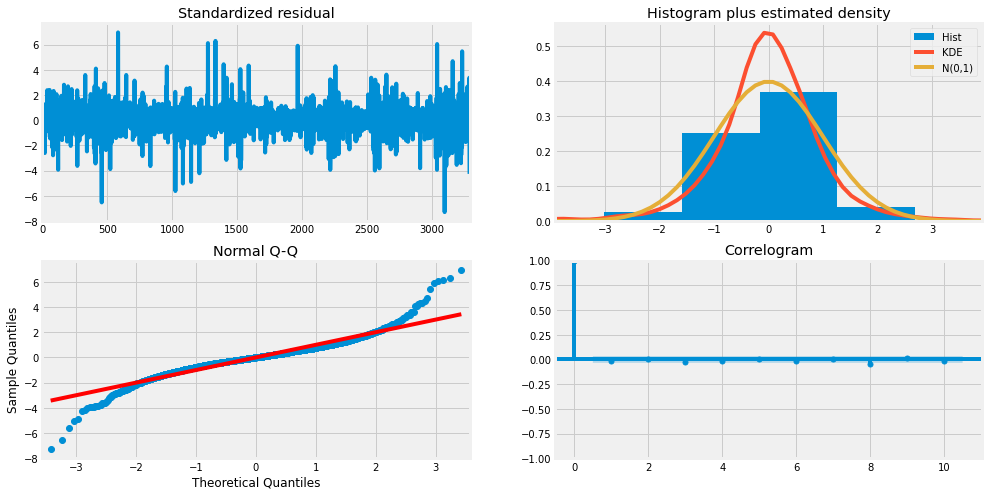

In [40]:
model_autoARIMA = auto_arima(log_trans, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

From the output, 
<br> "Best model:  ARIMA(0,1,0)"

Alright, now let's try to fit ARIMA model

In [41]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(log_trans, order=(0,1,0))  
result_ARIMA = model.fit()  
print(result_ARIMA.summary())

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3295
Model:                 ARIMA(0, 1, 0)   Log Likelihood                8069.355
Date:                Fri, 05 May 2023   AIC                         -16136.709
Time:                        12:49:25   BIC                         -16130.609
Sample:                             0   HQIC                        -16134.526
                               - 3295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004    5.3e-06     82.215      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):              5310.30
Prob(Q):                              0.26   Pr

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



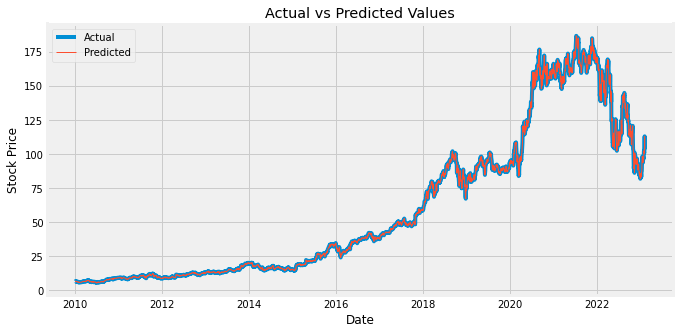

In [42]:
# Get the predicted values
pred_values = result_ARIMA.predict(start=1, end=len(log_trans), typ='levels')
pred_values = np.exp(pred_values)

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(df_month.index, df_month['Close'], label='Actual')
plt.plot(df_month.index, pred_values, label='Predicted', linewidth = 1)
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



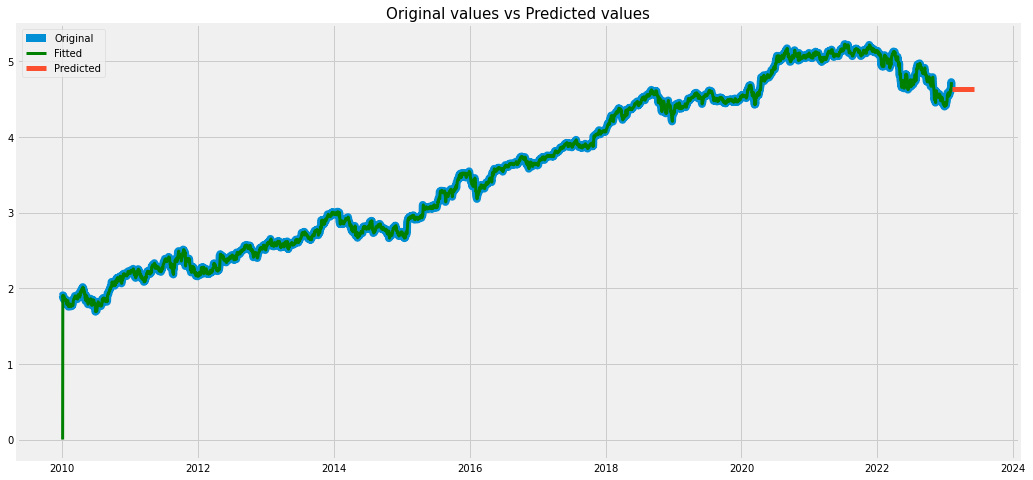

In [43]:
# Forecast future values
future_values = result_ARIMA.forecast(steps=120)
# Define the start date and frequency of the new index
start_date = df_month.index[-1] + pd.DateOffset(days=1)
freq = pd.infer_freq(df_month.index)

# Generate the new index
pred_index = pd.date_range(start=start_date, periods=len(future_values), freq=freq)

# Plot original data and forecasted values
plt.figure(figsize=(16,8))
plt.plot(log_trans, label='Original', linewidth = 8)
plt.plot(result_ARIMA.fittedvalues, color='green', label='Fitted', linewidth = 3)
plt.plot(pred_index, future_values, label='Predicted', linewidth = 5)
plt.legend()
plt.title("Original values vs Predicted values", fontsize = 15)
plt.show()


In [44]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

log_trans_df = pd.DataFrame(log_trans)

# Split data into train and test sets
train = log_trans_df[:-60]
test = log_trans_df[-60:]

# Fit ARIMA model on train set
model = ARIMA(train['Close'], order=(0,1,0))
result = model.fit()

# Generate predictions on test set
pred_values = result.predict(start=len(train), end=len(log_trans_df)-1, typ='levels')


# Evaluate performance on test set
mse = mean_squared_error(test['Close'], pred_values)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)


C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Test RMSE: 0.07113827935692238


C:\Users\Anuja\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



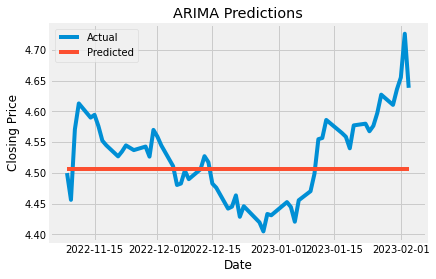

In [45]:
# Plot actual and predicted values
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, pred_values, label='Predicted')
plt.legend()
plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


## LSTM: Long Short Term Memory

In [46]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM


In [47]:
#create a new dataframe with only close column
data = df_month[['Close']]

#convert df to numpy array
dataset = data.values

#reshape the data to have a single feature
dataset = dataset.reshape(-1, 1)

#get the number of rows to train LSTM model
#training 80% of data
training_data_len = (len(dataset) *.8)

#let's round this using math.ceil
training_data_len = math.ceil(len(dataset) *.8)

print("Length of training dataset:", training_data_len)

Length of training dataset: 2636


**Scaling the data** - in practice it is always avdantegous to scale the data before giving it to the Neural Networks


In [48]:
#we want the scale to range from zero to one (inclusive)
scaler = MinMaxScaler(feature_range=(0,1))   
#lets fit dataset
scaled_data = scaler.fit_transform(dataset)

In [49]:
#create scaled training dataset
train_data = scaled_data[0:training_data_len,:]
#split data into x_train and y_train datasets
x_train = []   #independant variable
y_train = []   #dependant variable

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0]) #contain 60 values from 0 to 59
    y_train.append(train_data[i,0])      #60 first values at index 60

#     if i<= 61:
#         print(x_train)
#         print(y_train)
#         print()  

In [50]:
#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
#reshape the data - LSTM expects data to be in 3D- right now we have 2d data
x_train = np.reshape(x_train , (x_train.shape[0],x_train.shape[1],1))

In [52]:
#build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
#compile the model

model.compile(optimizer = 'adam', loss = 'mean_squared_error') #optimizer used to improve upon and loss function is used to see how well the model did

In [53]:
model.fit(x_train,y_train, batch_size =1, epochs = 1)

2576/2576 [==============================] - 128s 47ms/step - loss: 4.8831e-04


In [54]:
#create the testing dataset
#create a new array containing scaled values from index 
test_data = scaled_data[training_data_len-60:, : ]

#create dataset x_test, y _test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [55]:
#convert the data into numpy array
x_test = np.array(x_test)

#reshape the data to 3d for lstm
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

(x_test.shape[0],x_test,shape[1],1) = number of rows, number of columns, total feature ('Close' which is just one column in our case)

In [56]:
#we want to get the predicted values from LSTM model for x_test
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)  #unscaling the values to match it with y_test

21/21 [==============================] - 1s 24ms/step


In [57]:
# Evaluation: from root mean square error(RMSE)
rsme = np.sqrt(np.mean(predictions - y_test)**2)
rsme

2.083072103078469

RMSE of 2.083 means that, on average, the predicted values differ from the actual values by approximately 2.083 units. 

In [58]:
df = pd.DataFrame(data)
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Prediction'] = predictions

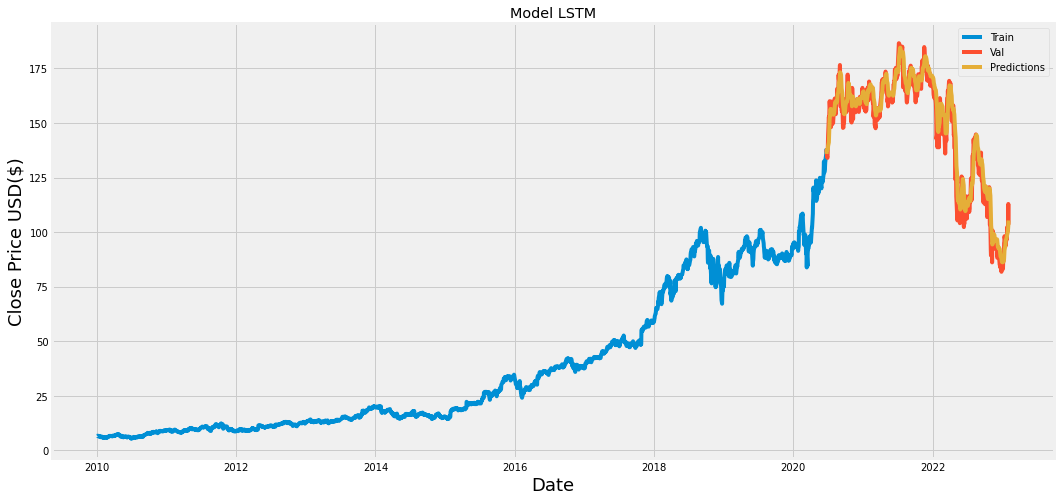

In [59]:
#visualize
plt.figure(figsize = (16,8))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Predictions'], loc = 'best')
plt.show()

Blue - Data on which model was trained on
Orange - Actual closing stock price 
Yellow - LSTM model predicted
<br>
Well, it seems a pretty decent result

**let's predict a price for future 120 days**

In [ ]:
future_predictions = []                                   #define an empty list for future predictions
current_batch = x_test[-60:].reshape((1, 60, 1))          # initialize current_batch with the last 60 values of the test set x_test

for i in range(60):
    future_pred = model.predict(current_batch)[0]
    future_predictions.append(future_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[future_pred]], axis=1)

future_predictions = scaler.inverse_transform(future_predictions)  #unscale the predictions to match with y 


In [ ]:
# Create a new date range for the predictions
last_date = df_month.index.values[-1]
date_range = pd.date_range(last_date, periods=120, freq='D')

# Plot the predicted values
plt.figure(figsize=(16, 8))
plt.title('LSTM Model Prediction for future 120 days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_month.index, df_month['Close'])
plt.plot(date_range, future_predictions)
plt.legend(['Historical Data', 'Predictions'], loc='lower right')
plt.show()